# Proyecto EasyVisa

## Contexto:

Las comunidades empresariales en los Estados Unidos se enfrentan a una gran demanda de recursos humanos, pero uno de los desafíos constantes es identificar y atraer el talento adecuado, que es quizás el elemento más importante para seguir siendo competitivo. Las empresas en los Estados Unidos buscan personas trabajadoras, talentosas y calificadas tanto a nivel local como en el extranjero.

La Ley de Inmigración y Nacionalidad (INA) de los EE. UU. permite que los trabajadores extranjeros vengan a los Estados Unidos a trabajar de manera temporal o permanente. La ley también protege a los trabajadores estadounidenses contra impactos adversos en sus salarios o condiciones de trabajo al garantizar el cumplimiento de los requisitos legales por parte de los empleadores estadounidenses cuando contratan trabajadores extranjeros para cubrir la escasez de mano de obra. Los programas de inmigración son administrados por la Oficina de Certificación de Trabajo Extranjero (OFLC).

OFLC procesa las solicitudes de certificación laboral para los empleadores que buscan traer trabajadores extranjeros a los Estados Unidos y otorga certificaciones en aquellos casos en los que los empleadores pueden demostrar que no hay suficientes trabajadores estadounidenses disponibles para realizar el trabajo con salarios que alcanzan o superan el salario pagado por la ocupación. en el área de empleo previsto.

## Objetivo:

En el año fiscal 2016, la OFLC procesó 775 979 solicitudes de empleadores para 1 699 957 puestos para certificaciones laborales temporales y permanentes. Este fue un aumento del nueve por ciento en el número total de solicitudes procesadas con respecto al año anterior. El proceso de revisión de cada caso se está convirtiendo en una tarea tediosa ya que el número de solicitantes aumenta cada año.

El creciente número de solicitantes cada año requiere una solución basada en aprendizaje automático que pueda ayudar a preseleccionar a los candidatos que tienen mayores posibilidades de aprobación de VISA. OFLC ha contratado a su empresa EasyVisa para soluciones basadas en datos. Usted, como científico de datos, debe analizar los datos proporcionados y, con la ayuda de un modelo de clasificación:

*Facilitar el proceso de aprobación de visas.* Recomendar un perfil adecuado para los solicitantes a quienes se les debe certificar o denegar la visa en función de los factores que influyen significativamente en el estado del caso.


## Datos Descripción

Los datos contienen los diferentes atributos del empleado y del empleador. El diccionario de datos detallado se proporciona a continuación.

* case_id: ID de cada solicitud de visa
* continent: Información del continente del empleado
* education_of_employee: Información de educación del empleado
* has_job_experience: ¿El empleado tiene alguna experiencia laboral? S= Sí; N = No
* require_job_training: ¿El empleado requiere alguna capacitación laboral? S = Sí; N = No
* no_de_employees: Número de empleados en la empresa del empleador
* yr_of_estab: Año en que se constituyó la empresa del empleador
* region_of_employment:: información de la región prevista de empleo del trabajador extranjero en los EE. UU.
* prevailing_wage: Salario promedio pagado a trabajadores empleados de manera similar en una ocupación específica en el área de empleo prevista. El propósito del salario prevaleciente es asegurar que el trabajador extranjero no esté mal pagado en comparación con otros trabajadores que ofrecen el mismo servicio o un servicio similar en la misma área de empleo.
* unit_of_wage: Unidad de salario prevaleciente. Los valores incluyen por salario por hora, Semanal, Mensual y Anual.
* full_time_position: ¿El puesto de trabajo es de tiempo completo? Y = Puesto de tiempo completo; N = Puesto a tiempo parcial
* case_status: Indicador que indica si la Visa fue certificada o denegada

## Importación de bibliotecas y datos necesarios

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)


import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

# from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv("./EasyVisa.csv")
target = "case_status"
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [3]:
data.shape

(25480, 12)

In [4]:
# Reemplazar los valores 'Y' por 'sí' y 'N' por 'no'
data['has_job_experience'] = data['has_job_experience'].replace({'Y': 'si', 'N': 'no'})
data['requires_job_training'] = data['requires_job_training'].replace({'Y': 'si', 'N': 'no'})
data['full_time_position'] = data['full_time_position'].replace({'Y': 'si', 'N': 'no'})

# Mostrar el DataFrame actualizado
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,no,no,14513,2007,West,592.2029,Hour,si,Denied
1,EZYV02,Asia,Master's,si,no,2412,2002,Northeast,83425.6500,Year,si,Certified
2,EZYV03,Asia,Bachelor's,no,si,44444,2008,West,122996.8600,Year,si,Denied
3,EZYV04,Asia,Bachelor's,no,no,98,1897,West,83434.0300,Year,si,Denied
4,EZYV05,Africa,Master's,si,no,1082,2005,South,149907.3900,Year,si,Certified


## Resumen de datos

- Observaciones
- Controles de cordura

In [5]:
data.columns.values

array(['case_id', 'continent', 'education_of_employee',
       'has_job_experience', 'requires_job_training', 'no_of_employees',
       'yr_of_estab', 'region_of_employment', 'prevailing_wage',
       'unit_of_wage', 'full_time_position', 'case_status'], dtype=object)

* No existe problemas con el nombre de las columnas

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


* Los tipos están acorde al diccionario de datos
* No encontramos valores faltantes

## Análisis de target

In [7]:
# cantidad de valores en la clasificación
data[target].unique()

array(['Denied', 'Certified'], dtype=object)

* Por lo general el target no se trabaja con string se tiene que trabajar con valores categoricos y/o numéricos, en este caso 0 y 1

In [8]:
# Hacemos el cambio
data[target] = data[target].apply(lambda x: 1 if x == "Certified" else 0)
data[target].unique()  # 0-> Denied, 1-> Certified

array([0, 1])

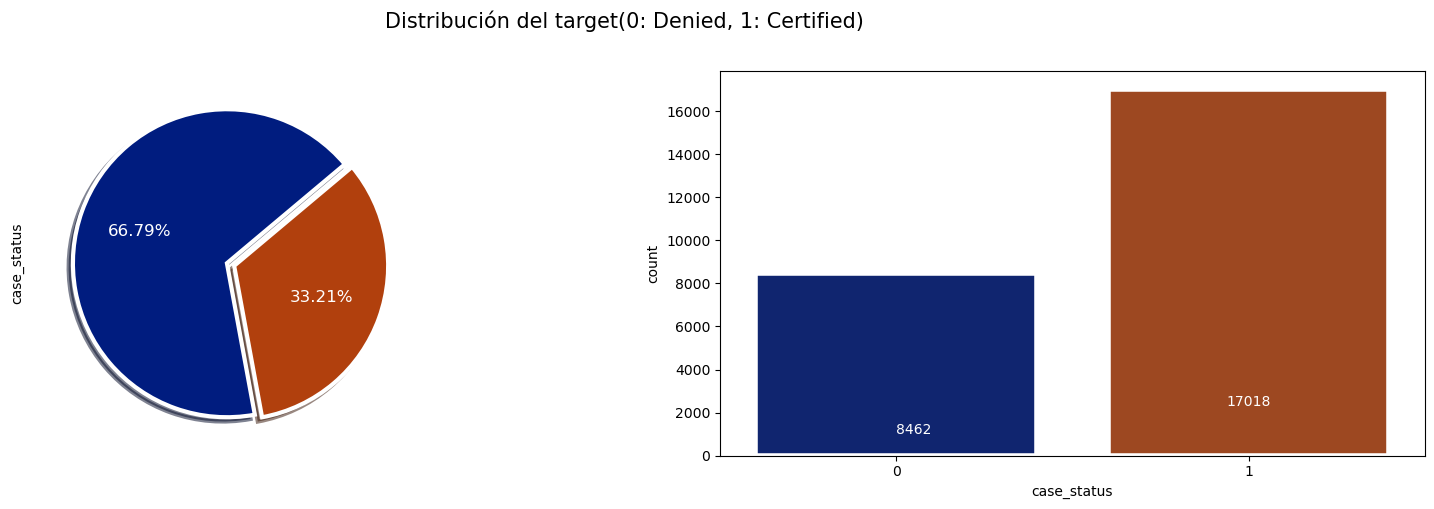

In [9]:
f,ax= plt.subplots(1,2,figsize=(20,5))
sns.countplot(data = data, x=target, ax=ax[1],palette='dark',edgecolor='white', linewidth=4)
data[target].value_counts().plot.pie(autopct='%.2f%%',explode=[0,0.05], ax=ax[0],colors=sns.color_palette('dark'),shadow = 'True',
        startangle = 40,
        textprops = {'color': 'White','fontsize':12},
        wedgeprops = {'linewidth':3,'edgecolor':'white'},
        rotatelabels = 'true')
ax[1].text(x=0,y=1000,s=data[target].value_counts()[0], color='white')
ax[1].text(x=1,y=2500,s=data[target].value_counts()[1], color='white', va='center', ha='center')
f.suptitle('Distribución del target(0: Denied, 1: Certified)',y=0.98,ha='center',va='center',size=15, weight=150)
plt.show()

## Análisis Estadístico

In [10]:
# Resumen estadistico

univariate = data.describe().transpose()
univariate.reset_index(inplace=True)  # quito los indices
univariate.rename(
    columns={
        "index": "feature",  # cambio los nombres
        "25%": "Q1",
        "50%": "median",
        "75%": "Q3",
    },
    inplace=True,
)
univariate

,feature,count,mean,std,min,Q1,median,Q3,max
0,no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
1,yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
2,prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
3,case_status,25480.0,0.667896,0.470977,0.0000,0.00,1.00,1.0000,1.00


* Notamos que en la variable no_of_employees tiene valores negativos, pero no podemos tener valores negativos para la cantidad de empleados
* Tambien notamos que el salario minimo de un trabajador en el extranjeto no puede ser de 2.1 asumiendo que es en dolares 2 dolares no se considera un salario, asi que pondremos un minimos de 300 dolares para ello

In [11]:
# Mostramos todos las filas con cantidad de empleados negativa
data.loc[data.no_of_employees < 0]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
245,EZYV246,Europe,Master's,no,no,-25,1980,Northeast,39452.9900,Year,si,1
378,EZYV379,Asia,Bachelor's,no,si,-11,2011,Northeast,32506.1400,Year,si,0
832,EZYV833,South America,Master's,si,no,-17,2002,South,129701.9400,Year,si,1
2918,EZYV2919,Asia,Master's,si,no,-26,2005,Midwest,112799.4600,Year,si,1
6439,EZYV6440,Asia,Bachelor's,no,no,-14,2013,South,103.9700,Hour,si,0
6634,EZYV6635,Asia,Bachelor's,si,no,-26,1923,West,5247.3200,Year,si,0
7224,EZYV7225,Europe,Doctorate,no,no,-25,1998,Midwest,141435.9500,Year,si,1
7281,EZYV7282,Asia,High School,no,no,-14,2000,Midwest,58488.5000,Year,si,0
7318,EZYV7319,Asia,Bachelor's,si,si,-26,2006,South,115005.6100,Year,si,1
7761,EZYV7762,Asia,Master's,no,no,-11,2009,Midwest,38457.5100,Year,si,1


In [12]:
# Eliminamos esos datos
data = data.loc[data.no_of_employees >= 0]

In [13]:
# Comprobamos que fueron eliminados
print(data.loc[data.no_of_employees < 0])

Empty DataFrame
Columns: [case_id, continent, education_of_employee, has_job_experience, requires_job_training, no_of_employees, yr_of_estab, region_of_employment, prevailing_wage, unit_of_wage, full_time_position, case_status]
Index: []


In [14]:
# Mostramos todos las filas con cantidad de empleados negativa
data.loc[data.prevailing_wage < 300]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
54,EZYV55,Asia,Master's,si,no,11733,1995,Northeast,230.8072,Hour,si,1
62,EZYV63,Asia,High School,no,no,5110,2004,West,103.2216,Hour,si,0
70,EZYV71,Asia,High School,si,no,1320,2001,Northeast,230.3270,Hour,si,0
168,EZYV169,Asia,Bachelor's,no,no,3639,1988,Northeast,192.1570,Hour,si,0
208,EZYV209,North America,High School,no,no,2741,2005,Northeast,158.3807,Hour,si,0
...,...,...,...,...,...,...,...,...,...,...,...,...
25375,EZYV25376,North America,High School,no,no,392,2001,Island,257.6129,Hour,si,1
25390,EZYV25391,Asia,Bachelor's,si,no,1203,1873,Midwest,143.4372,Hour,si,0
25443,EZYV25444,Africa,Bachelor's,no,no,72892,2007,Northeast,215.1000,Hour,si,1
25444,EZYV25445,South America,Master's,si,no,1081,1838,Northeast,156.6070,Hour,si,1


In [15]:
# Eliminamos esos datos
data = data.loc[data.prevailing_wage >= 300]

In [16]:
# Comprobamos que fueron eliminados
print(data.loc[data.prevailing_wage < 300])

Empty DataFrame
Columns: [case_id, continent, education_of_employee, has_job_experience, requires_job_training, no_of_employees, yr_of_estab, region_of_employment, prevailing_wage, unit_of_wage, full_time_position, case_status]
Index: []


In [17]:
# Volvermos a crear mi analisis estadistico
univariate = data.describe().transpose()
univariate.reset_index(inplace=True)  # quito los indices
univariate.rename(
    columns={
        "index": "feature",  # cambio los nombres
        "25%": "Q1",
        "50%": "median",
        "75%": "Q3",
    },
    inplace=True,
)
univariate

,feature,count,mean,std,min,Q1,median,Q3,max
0,no_of_employees,24520.0,5730.610726,23123.032583,12.0000,1034.000,2125.500,3524.2500,602069.00
1,yr_of_estab,24520.0,1979.598899,42.226219,1800.0000,1976.000,1997.000,2005.0000,2016.00
2,prevailing_wage,24520.0,77278.012907,51758.566556,300.0063,38573.525,72874.855,109381.4375,319210.27
3,case_status,24520.0,0.680057,0.466464,0.0000,0.000,1.000,1.0000,1.00


In [18]:
# Analisis de duplicados
duplicados = data.duplicated().sum()
duplicados

0

* No hay valores duplicados

--- 

## Análisis exploratorio de datos (EDA)

- EDA es una parte importante de cualquier proyecto que involucre datos.
- Es importante investigar y comprender mejor los datos antes de construir un modelo con ellos.
- A continuación se mencionan algunas preguntas que lo ayudarán a abordar el análisis de la manera correcta y generar conocimientos a partir de los datos.
- Se debe realizar un análisis exhaustivo de los datos, además de las preguntas que se mencionan a continuación.

### Análisis univariado

In [19]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # Longitud de la columna feature
    count = data[feature].nunique() # Número de valores únicos de en la columna
    if n is None:
        plt.figure(figsize=(count + 1, 4))
    else:
        plt.figure(figsize=(n + 1, 4))

    plt.xticks(rotation=90, fontsize=10)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # Porcentaje de cada clase categorica
        else:
            label = p.get_height()  # Recuento de cada nivel de categoria

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # Agregar etiqueta de la variable label

    plt.show()

In [20]:
def plot_boxplot_histogram(data, feature, figsize=(10, 8), kde=True, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(   # Se crean dos subplots, uno para boxplot y otro para el histograma
        nrows=2,
        sharex=True,  # comparten el eje x
        gridspec_kw={"height_ratios": (0.25, 0.75)}, # tamaño de los gráficos
        figsize=figsize,
    )  
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="#2ecc71"  #showmeans indica que se mostrará la media
    )  
    
    if (data[feature].dtype == 'int64'):
        sns.histplot(data=data, x=feature, ax=ax_hist2)
        ax_hist2.xaxis.set_major_locator(mtick.MaxNLocator(integer=True))
    if (data[feature].dtype == 'float64'):
        sns.histplot(data=data, x=feature, ax=ax_hist2)
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Agrega ka nedia de la variable feature
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Agrega la mediana de la variable feature
    ax_box2.set_title(f"Boxplot e Histograma de {feature}", 
                      fontdict = {'fontsize': 15})
    plt.show()

In [21]:
# selección de variables categóricas y numericas
df_categoricas = data.select_dtypes(include=['object']).columns.to_list()
df_numericas = data.select_dtypes(include=['float64', 'int64']).columns.to_list()
print("\033[1m" + 'Variables categoricas' + "\033[0m\n", df_categoricas)
print("\033[1m" + 'Variables numericas' + "\033[0m\n", df_numericas)

Variables categoricas
 ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position']
Variables numericas
 ['no_of_employees', 'yr_of_estab', 'prevailing_wage', 'case_status']


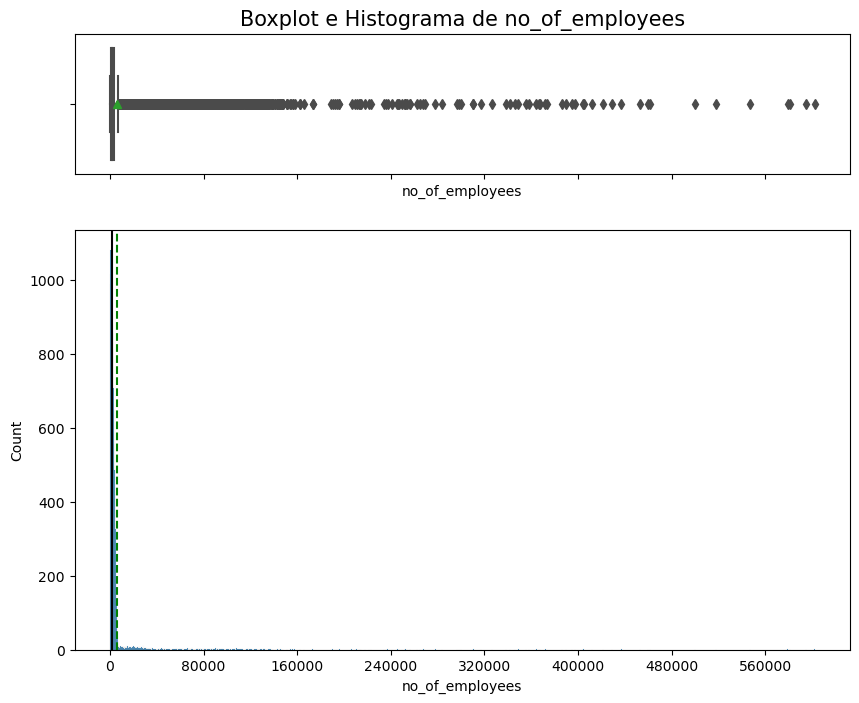

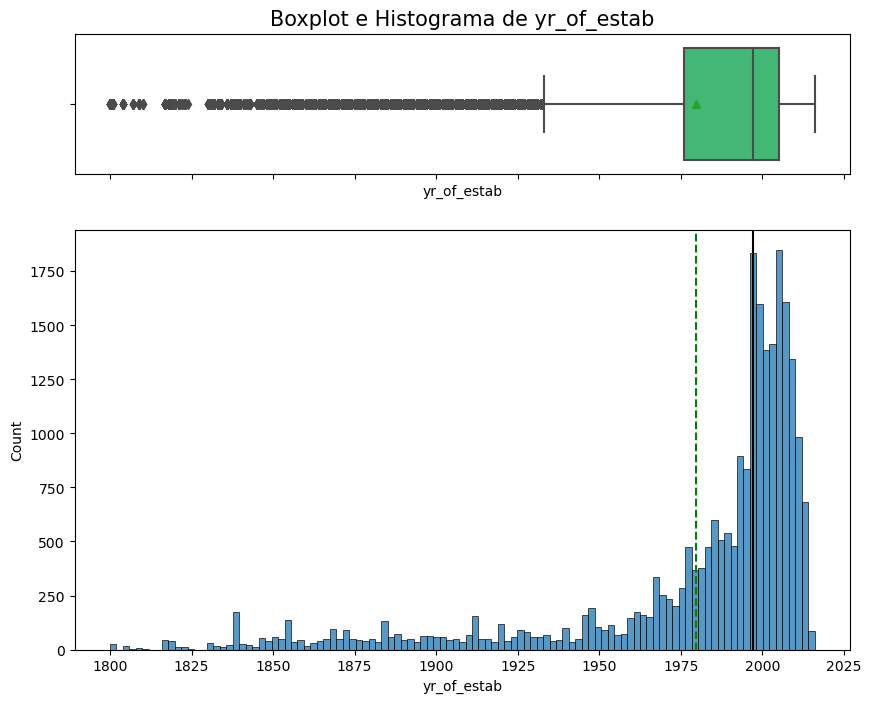

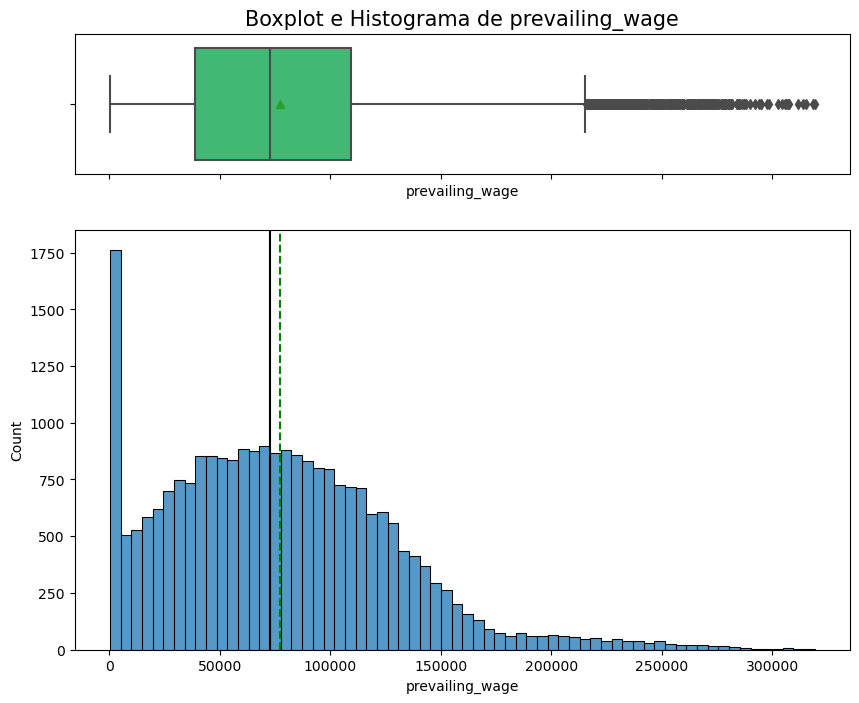

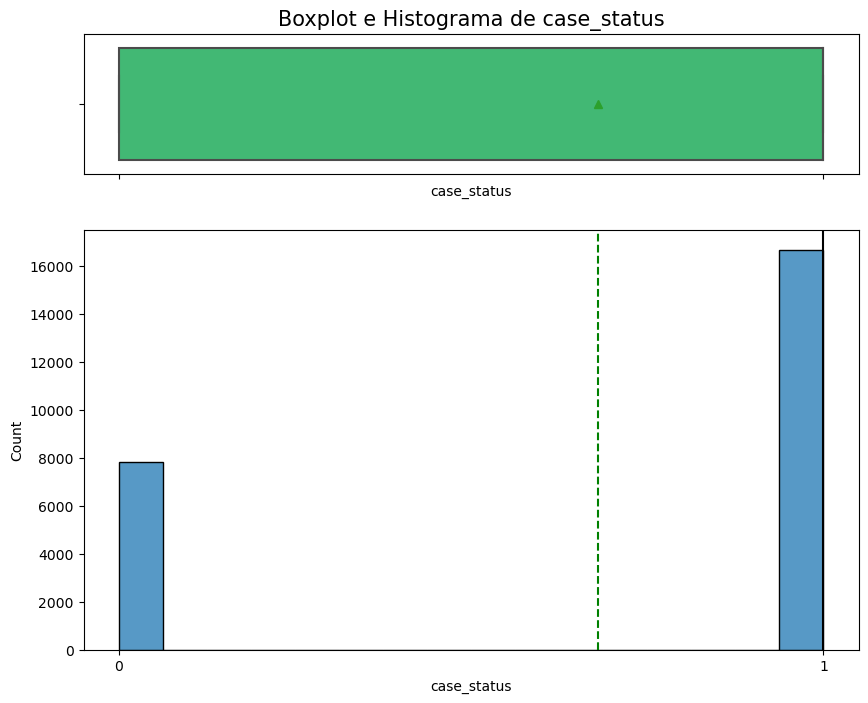

In [22]:
# Mostrando los graficos de las variables numéricas
for i in df_numericas:
    plot_boxplot_histogram(data, i)

* Presencia de outliers en la mayoria de variables
* Presencia de distribución hacia la derecha como distribución hacia la izquierda

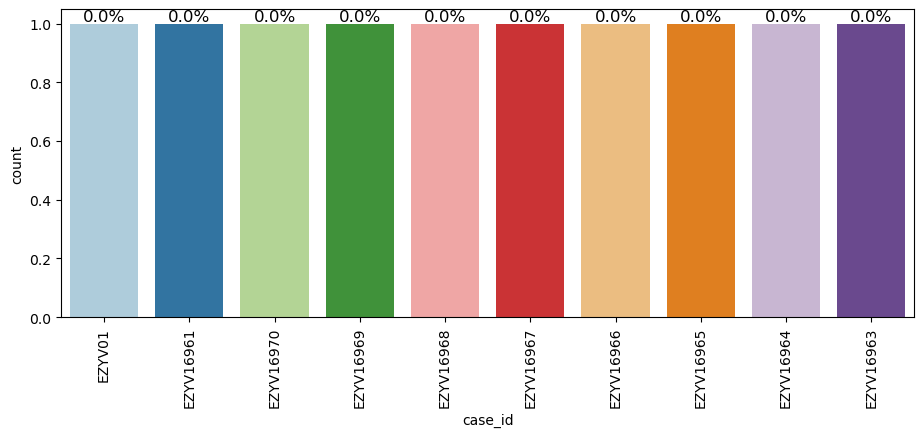

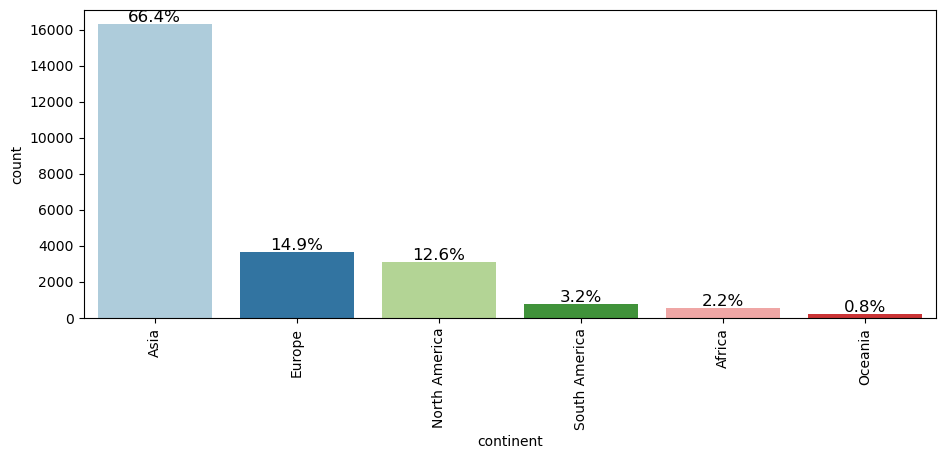

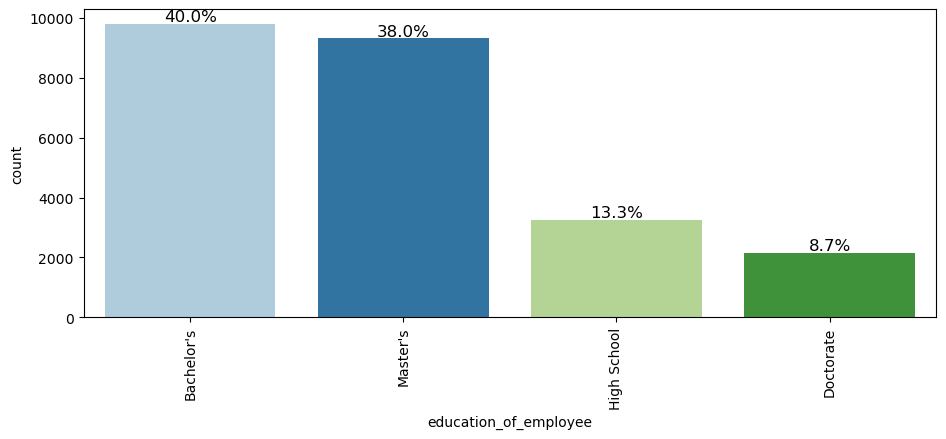

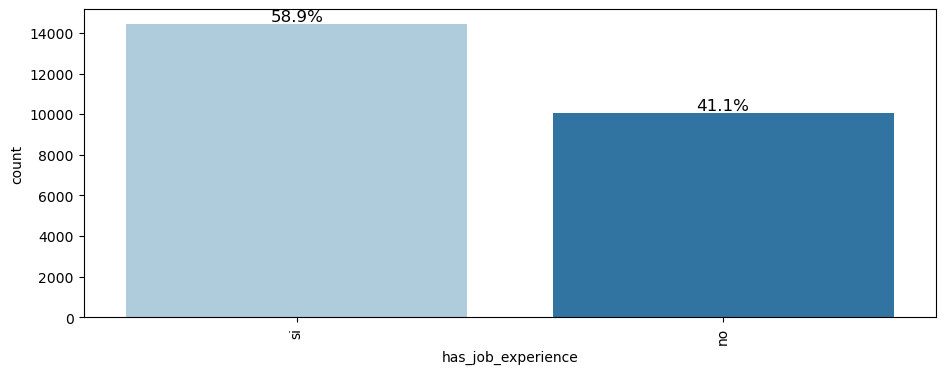

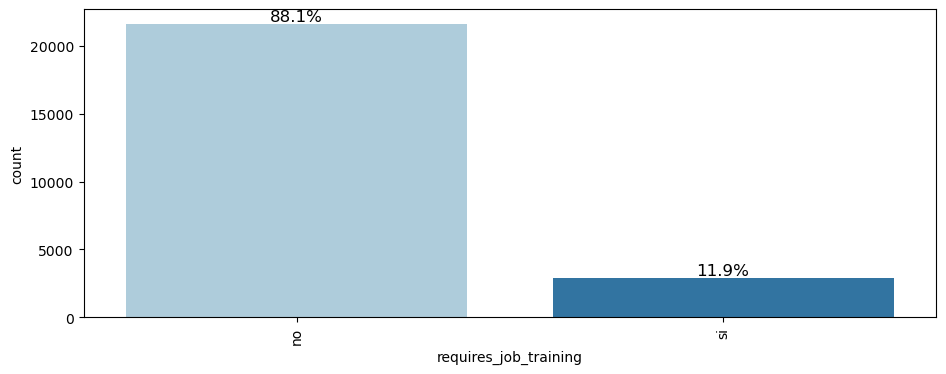

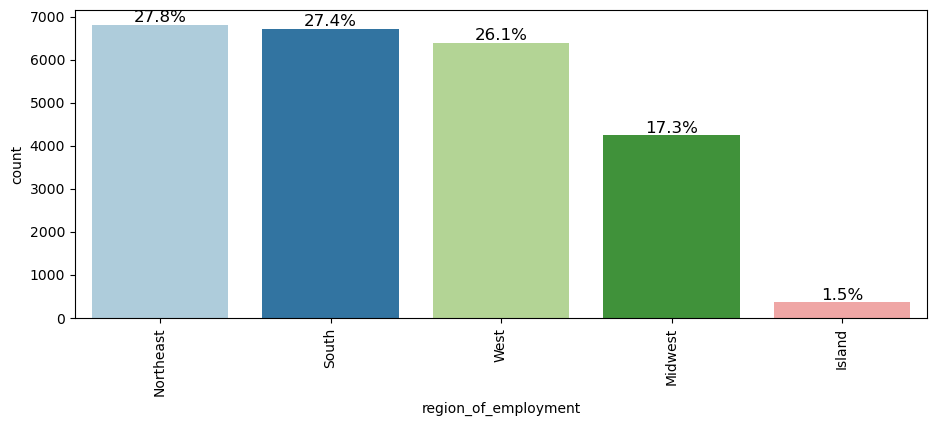

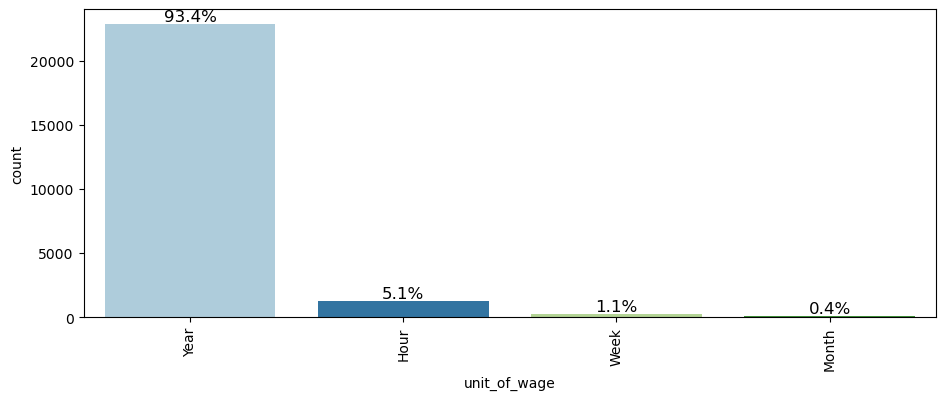

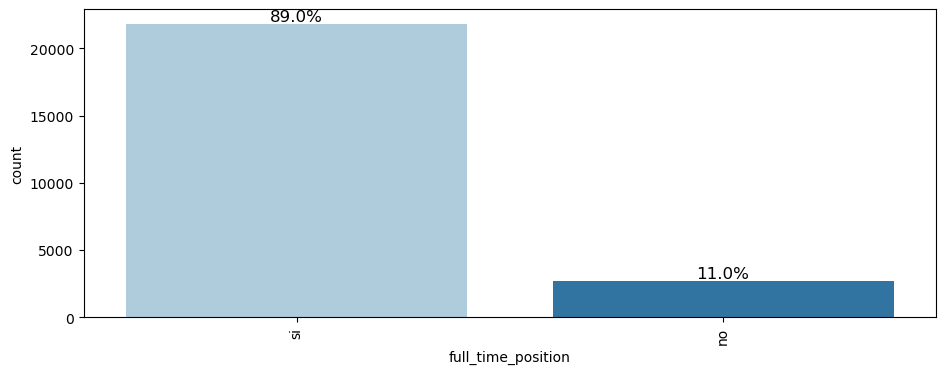

In [23]:
for i in df_categoricas:
    labeled_barplot(data, i, perc=True,n=10)

* La variable case_id se va a eliminar porque no presenta valor para nuestro modelo, es solo un identificador de los registros
* La variable continent, presenta valores muy pequeños para south America, Africa y Ocenania porlo tanto se sumaran en una nueva categoria llamada "otros"
* La variable region_of_employment, presenta valores muy escasos para "island", para no afectar la distribución se le va a aumentar a la variable "Northeast"
* La variable "unit_of_wage" presenta valores escasos para "hour", "week" y para "Month" por lo tanto se los va a sumar a una nueva variable llamada "otros"

### Análisis bivariado

* En general, no es necesario realizar un análisis bivariado antes de entrenar un árbol de decisión. Los árboles de decisión son capaces de capturar relaciones no lineales y de orden superior entre las características y la variable objetivo. Por lo tanto, el algoritmo de árbol de decisión en sí mismo se encarga de evaluar la importancia de las características y cómo interactúan entre sí.

* Sin embargo, un análisis bivariado podría ser útil para comprender la relación entre cada característica y la variable objetivo antes de aplicar el algoritmo de árbol de decisión. Esto puede ayudarte a identificar relaciones lineales o no lineales, detectar posibles problemas y mejorar la interpretación de los resultados del modelo.

<AxesSubplot:>

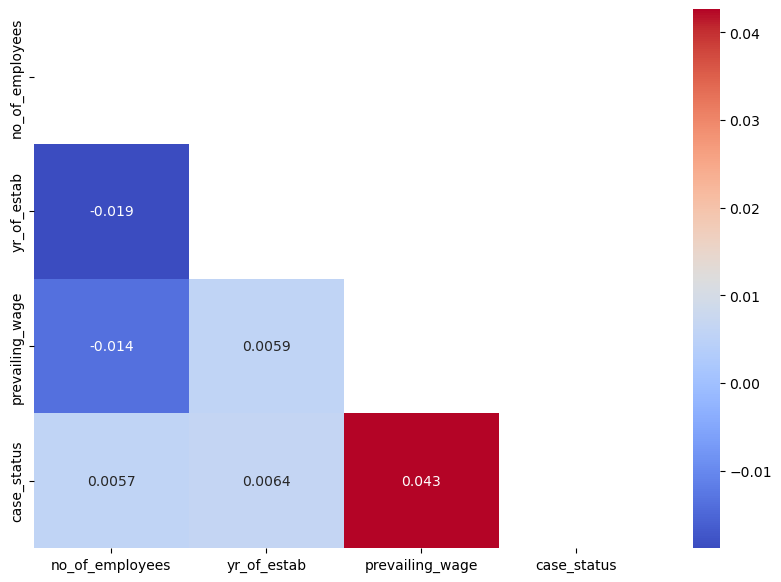

In [24]:
# Manera 2
# Visualización de un headmap
plt.figure(figsize= (10,7))
correlaciones = data[df_numericas].corr()
upp_mat = np.triu(correlaciones)        #upp_mat, crea una matriz triangular superior a la matriz dada
sns.heatmap(correlaciones, annot = True, cmap = 'coolwarm', mask = upp_mat) 


* No hay mucha correlación entre las variables

--- 

**Preguntas capciosas**:
1. Las personas con educación superior pueden querer viajar al extranjero por un trabajo bien remunerado. ¿La educación juega un papel en la certificación de Visa?

2. ¿Cómo varía el estado de la visa en los diferentes continentes?
 
3. Los profesionales experimentados pueden buscar oportunidades en el extranjero para mejorar su estilo de vida y desarrollo profesional. ¿La experiencia laboral influye en el estado de la visa?
 
4. En los Estados Unidos, a los empleados se les paga en diferentes intervalos. ¿Qué unidad de pago es más probable que se certifique para una visa?
 
5. El gobierno de los Estados Unidos ha establecido un salario prevaleciente para proteger el talento local y los trabajadores extranjeros. ¿Cómo cambia el estado de la visa con el salario prevaleciente?

##### Pregunta 1.  Las personas con educación superior pueden querer viajar al extranjero por un trabajo bien remunerado. ¿La educación juega un papel en la certificación de Visa?

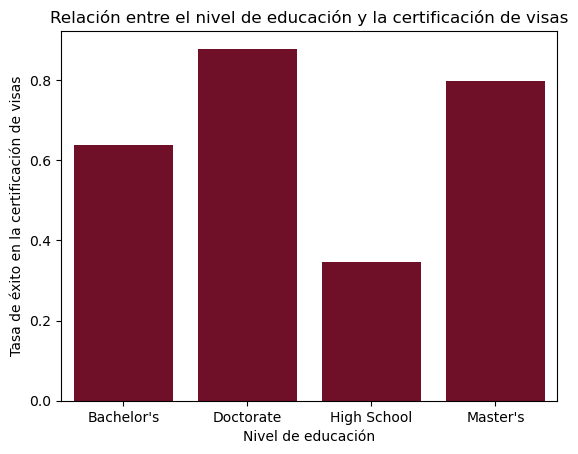

In [25]:
# Calcular la tasa de éxito en la certificación de visas para cada nivel de educación
success_rate_by_education = data.groupby("education_of_employee")["case_status"].mean()

# Visualización
plt.figure()
sns.barplot(x=success_rate_by_education.index, y=success_rate_by_education.values, color='#800020')
plt.xlabel("Nivel de educación")
plt.ylabel("Tasa de éxito en la certificación de visas")
plt.title("Relación entre el nivel de educación y la certificación de visas")
plt.show()

* Notamos que tanto los doctorados como los Master tienen una mayor cantidad de exito en el visa a EEUU por lo tanto se puede interpretar que la educación si juega un papel importante en la certificación de Visa

##### Pregunta 2. ¿Cómo varía el estado de la visa en los diferentes continentes?

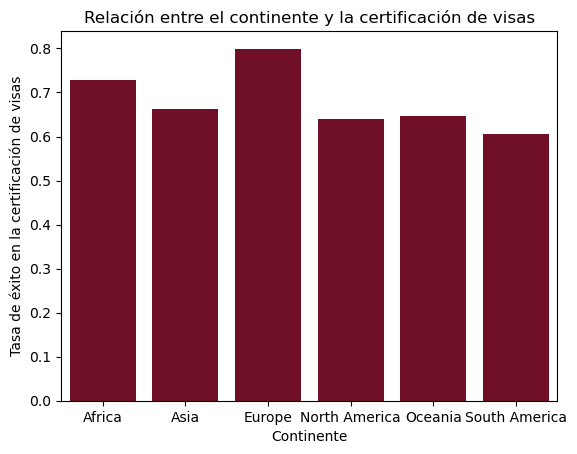

In [26]:
# Calcular la tasa de éxito en la certificación de visas para cada continente
success_rate_by_continent = data.groupby("continent")["case_status"].mean()

# Visualización
plt.figure()
sns.barplot(x=success_rate_by_continent.index, y=success_rate_by_continent.values,color='#800020')
plt.xlabel("Continente")
plt.ylabel("Tasa de éxito en la certificación de visas")
plt.title("Relación entre el continente y la certificación de visas")
plt.show()

* Notamos que los contienentes con mayor exito de Visa son como primer lugar Europa y como segundo lugar Africa

##### Pregunta 3. Los profesionales experimentados pueden buscar oportunidades en el extranjero para mejorar su estilo de vida y desarrollo profesional. ¿La experiencia laboral influye en el estado de la visa?

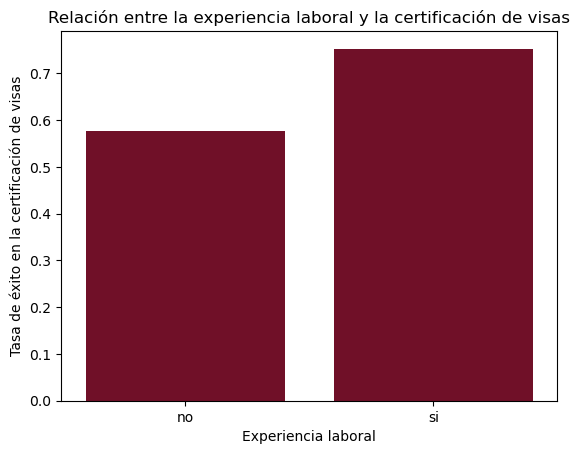

In [27]:
# Calcular la tasa de éxito en la certificación de visas para cada grupo de experiencia laboral
success_rate_by_experience = data.groupby("has_job_experience")["case_status"].mean()

# Crear un gráfico de barras para mostrar la tasa de éxito en la certificación de visas por grupo de experiencia laboral
plt.figure()
sns.barplot(x=success_rate_by_experience.index, y=success_rate_by_experience.values, color='#800020')
plt.xlabel("Experiencia laboral")
plt.ylabel("Tasa de éxito en la certificación de visas")
plt.title("Relación entre la experiencia laboral y la certificación de visas")
plt.show()

* La experiencia labora si influye en el proceso de seleccion de la Visa sin embargo no podemos notar una influencia abismal a diferencia de las personas que no poseen experiencia en el mercado laboral.

##### Pregunta 4. En los Estados Unidos, a los empleados se les paga en diferentes intervalos. ¿Qué unidad de pago es más probable que se certifique para una visa?

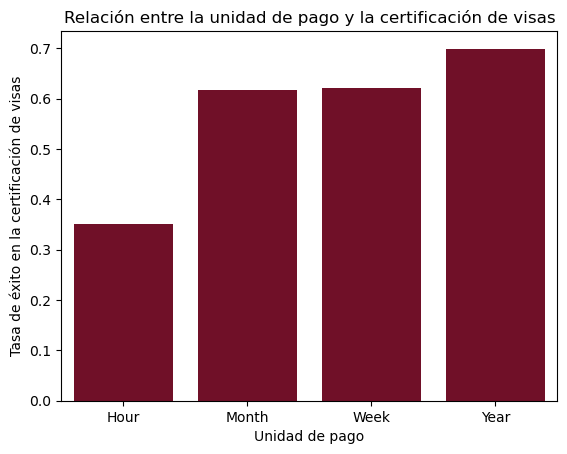

In [28]:
# Calcular la tasa de éxito en la certificación de visas para cada unidad de pago
success_rate_by_payment_unit = data.groupby("unit_of_wage")["case_status"].mean()

# Crear un gráfico de barras para mostrar la tasa de éxito en la certificación de visas por unidad de pago
plt.figure()
sns.barplot(x=success_rate_by_payment_unit.index, y=success_rate_by_payment_unit.values,color='#800020')
plt.xlabel("Unidad de pago")
plt.ylabel("Tasa de éxito en la certificación de visas")
plt.title("Relación entre la unidad de pago y la certificación de visas")
plt.show()

* La unidad de pago que es más probable que se certifique es de un salario anual

##### Pregunta 5. El gobierno de los Estados Unidos ha establecido un salario prevaleciente para proteger el talento local y los trabajadores extranjeros. ¿Cómo cambia el estado de la visa con el salario prevaleciente?

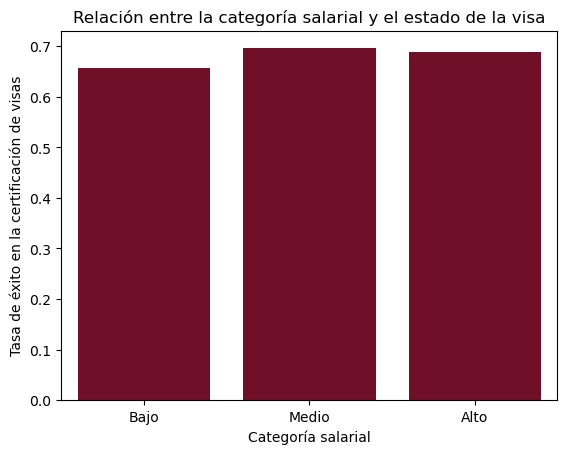

In [29]:
# Dividir los salarios prevalecientes en categorías (bajos, medios y altos)
bins = [0, data['prevailing_wage'].quantile(0.33), data['prevailing_wage'].quantile(0.67), data['prevailing_wage'].max()]
labels = ['Bajo', 'Medio', 'Alto']
data2 = data.copy()
data2['wage_category'] = pd.cut(data2['prevailing_wage'], bins=bins, labels=labels)

# Calcular la tasa de éxito en la certificación de visas para cada categoría salarial
success_rate_by_wage_category = data2.groupby('wage_category')['case_status'].mean()

# Crear un gráfico de barras para mostrar la tasa de éxito en la certificación de visas por categoría salarial
plt.figure()
sns.barplot(x=success_rate_by_wage_category.index, y=success_rate_by_wage_category.values, color='#800020')
plt.xlabel("Categoría salarial")
plt.ylabel("Tasa de éxito en la certificación de visas")
plt.title("Relación entre la categoría salarial y el estado de la visa")
plt.show()

* Para resolver esta pregunta, debido a que tenermos una variable numerica "salario" debemos categorizar tomando los percentiles adecuados y colocando como label "bajo", "medio" y "alto"
* Podemos notar que los salarios medios son más propensos a recibir la aceptación de la Visa

---

## Preprocesamiento de datos

- Tratamiento de valor perdido (si es necesario)
- Ingeniería de características
- Detección y tratamiento de valores atípicos (si es necesario)
- Preparación de datos para el modelado.
- Cualquier otro paso de preprocesamiento (si es necesario)

In [30]:
# Copia para tratar los datos 
df= data.copy()

### Ingeniería de características

* La variable case_id se va a eliminar porque no presenta valor para nuestro modelo, es solo un identificador de los registros
* La variable continent, presenta valores muy pequeños para south America, Africa y Ocenania porlo tanto se sumaran en una nueva categoria llamada "otros"
* La variable region_of_employment, presenta valores muy escasos para "island", para no afectar la distribución se le va a aumentar a la variable "Northeast"
* La variable "unit_of_wage" presenta valores escasos para "hour", "week" y para "Month" por lo tanto se los va a sumar a una nueva variable llamada "otros"

In [31]:
# Eliminar el case_id porque no nos proporciona valor al modelo, es solo un identificador
df = df.drop('case_id', axis=1)

In [32]:
# La variable continent, presenta valores muy pequeños para south America, 
# Africa y Ocenania porlo tanto se sumaran en una nueva categoria llamada "otros"
df.continent.value_counts()

Asia             16289
Europe            3654
North America     3079
South America      776
Africa             535
Oceania            187
Name: continent, dtype: int64

In [33]:
df['continent'] = df['continent'].replace(['South America','Africa','Oceania'], 'otros')
df['continent'].value_counts()

Asia             16289
Europe            3654
North America     3079
otros             1498
Name: continent, dtype: int64

In [34]:
# La variable region_of_employment, presenta valores muy escasos para "island",
# para no afectar la distribución se le va a aumentar a la variable "Northeast"
df.region_of_employment.value_counts()

Northeast    6812
South        6716
West         6391
Midwest      4238
Island        363
Name: region_of_employment, dtype: int64

In [35]:
df['region_of_employment'] = df['region_of_employment'].replace('Island', 'Northeast')
df.region_of_employment.value_counts()

Northeast    7175
South        6716
West         6391
Midwest      4238
Name: region_of_employment, dtype: int64

In [36]:
# La variable "unit_of_wage" presenta valores escasos para "hour", "week" y
# para "Month" por lo tanto se los va a sumar a una nueva variable llamada "otros
df['unit_of_wage'].value_counts()

Year     22903
Hour      1256
Week       272
Month       89
Name: unit_of_wage, dtype: int64

In [37]:
df['unit_of_wage'] = df['unit_of_wage'].replace(['Week','Month'], 'otros')
df['unit_of_wage'].value_counts()

Year     22903
Hour      1256
otros      361
Name: unit_of_wage, dtype: int64

In [38]:
# guardar los datos de los cambios
# df2  contiene todos los valores actualizados
df2 = df.copy()

---

### Tratamiento de valores numéricos

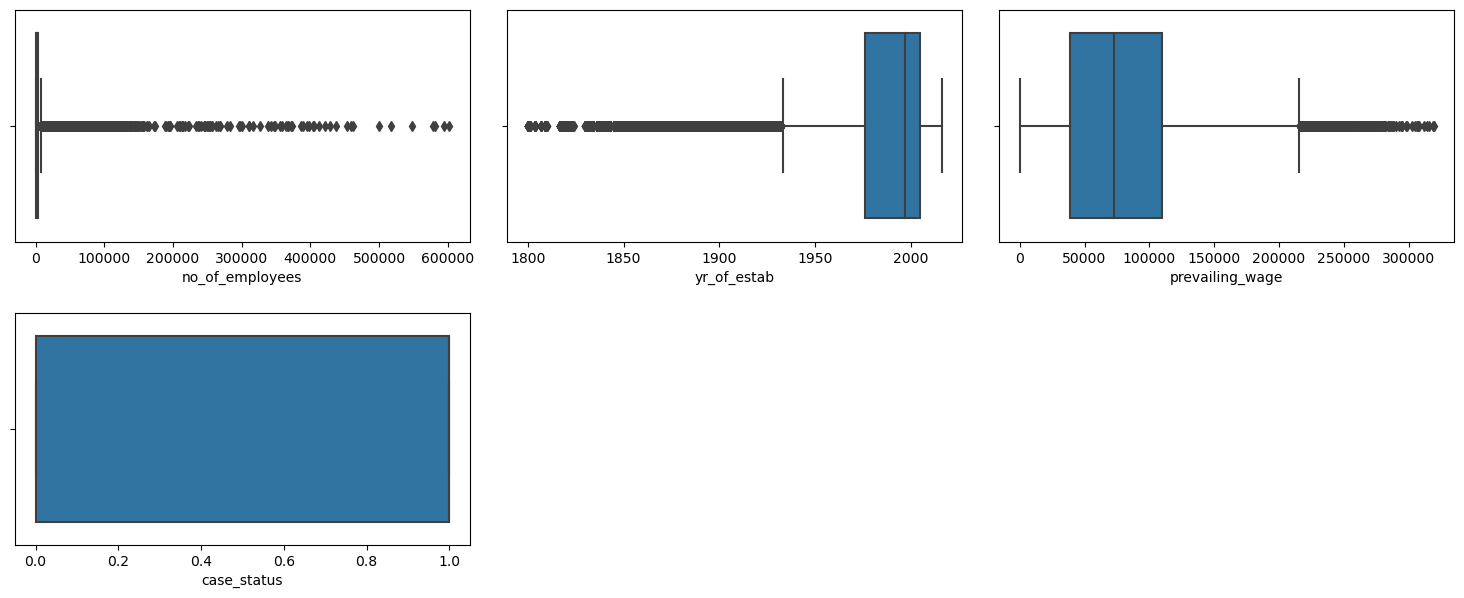

In [39]:
# Primero vamos a comprobar los valores atipicos
num_cols = df2.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(data=df2, x=variable)
    plt.tight_layout(pad=2)

plt.show()

In [40]:
# mostramos el cuadro estadistico anterior
univariate

,feature,count,mean,std,min,Q1,median,Q3,max
0,no_of_employees,24520.0,5730.610726,23123.032583,12.0000,1034.000,2125.500,3524.2500,602069.00
1,yr_of_estab,24520.0,1979.598899,42.226219,1800.0000,1976.000,1997.000,2005.0000,2016.00
2,prevailing_wage,24520.0,77278.012907,51758.566556,300.0063,38573.525,72874.855,109381.4375,319210.27
3,case_status,24520.0,0.680057,0.466464,0.0000,0.000,1.000,1.0000,1.00


In [41]:
df2["no_of_employees"] = np.log(df2["no_of_employees"]+1)
df2["prevailing_wage"] = np.log(df2["prevailing_wage"])


In [42]:
univariate_II = df2.describe().transpose().reset_index()
univariate_II

,index,count,mean,std,min,25%,50%,75%,max
0,no_of_employees,24520.0,7.546719,1.248697,2.564949,6.942157,7.662233,8.167707,13.308129
1,yr_of_estab,24520.0,1979.598899,42.226219,1800.000000,1976.000000,1997.000000,2005.000000,2016.000000
2,prevailing_wage,24520.0,10.802431,1.342648,5.703803,10.560321,11.196499,11.602596,12.673605
3,case_status,24520.0,0.680057,0.466464,0.000000,0.000000,1.000000,1.000000,1.000000


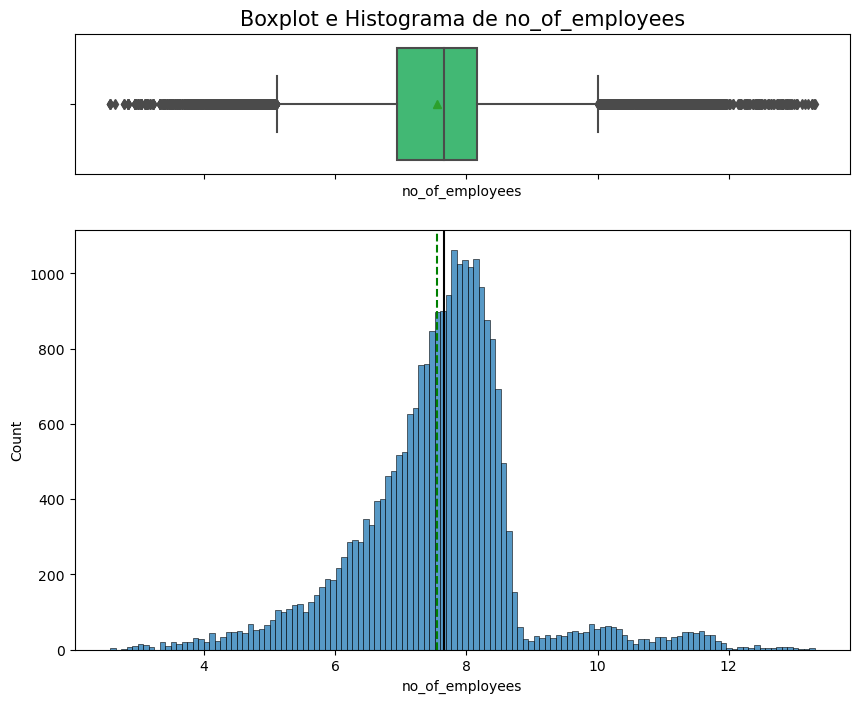

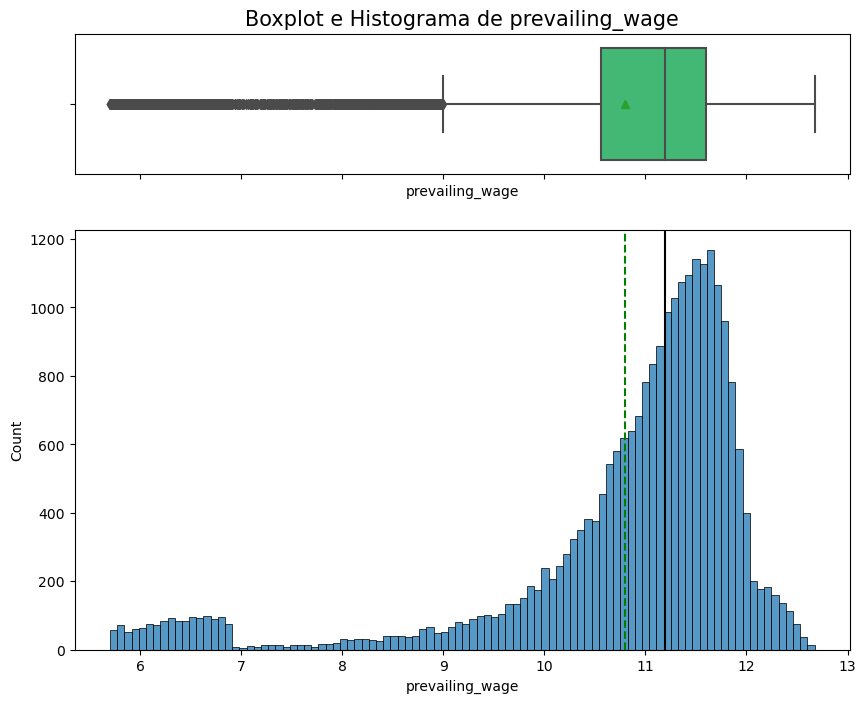

In [43]:
# Volvemos a ver la distribución
for i in df2[['no_of_employees','prevailing_wage']]:
    # Gráfico de distribución 
    plot_boxplot_histogram(df2, i)

* Notamos una mejora a comparación del analisis univariado realizado más arriba

In [44]:
# SEGUNDO -> Vamos a usar la tecnica de z-score con un porcentaje del 95%
# LI = Mean - Z*desviacion_estandar
# LS = Mean + Z*desviacion_estandar
# Z = 1.96 (95% confianza)

univariate_II['li_zscore'] = univariate_II['mean'] - 1.96*univariate_II['std']
univariate_II['ls_zscore'] = univariate_II['mean'] + 1.96*univariate_II['std']

univariate_II.head()

,index,count,mean,std,min,25%,50%,75%,max,li_zscore,ls_zscore
0,no_of_employees,24520.0,7.546719,1.248697,2.564949,6.942157,7.662233,8.167707,13.308129,5.099273,9.994164
1,yr_of_estab,24520.0,1979.598899,42.226219,1800.000000,1976.000000,1997.000000,2005.000000,2016.000000,1896.835510,2062.362288
2,prevailing_wage,24520.0,10.802431,1.342648,5.703803,10.560321,11.196499,11.602596,12.673605,8.170840,13.434022
3,case_status,24520.0,0.680057,0.466464,0.000000,0.000000,1.000000,1.000000,1.000000,-0.234212,1.594326


In [45]:
# Extraigo las columnas para recorrerlas despues
columnas = univariate_II['index'].tolist()
columnas

['no_of_employees', 'yr_of_estab', 'prevailing_wage', 'case_status']

In [46]:
# Tratamiento de outliers por Z-score

def zscore(dataframe, univariate, columnas):
    for col in columnas:
        desc = univariate.loc[univariate['index'] == col]
        dataframe[col + '_tzscore'] = dataframe[col].apply(lambda x: desc.ls_zscore.values[0] if x > desc.ls_zscore.values[0]
                                                                else desc.li_zscore.values[0] if x < desc.li_zscore.values[0]
                                                                else x)
    return dataframe

In [47]:
df2 = zscore(df2, univariate_II, columnas)
df2

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,no_of_employees_tzscore,yr_of_estab_tzscore,prevailing_wage_tzscore,case_status_tzscore
0,Asia,High School,no,no,9.582869,2007,West,6.383849,Hour,si,0,9.582869,2007.00000,8.170840,0
1,Asia,Master's,si,no,7.788626,2002,Northeast,11.331711,Year,si,1,7.788626,2002.00000,11.331711,1
2,Asia,Bachelor's,no,si,10.702008,2008,West,11.719914,Year,si,0,9.994164,2008.00000,11.719914,0
3,Asia,Bachelor's,no,no,4.595120,1897,West,11.331812,Year,si,0,5.099273,1897.00000,11.331812,0
4,otros,Master's,si,no,6.987490,2005,South,11.917773,Year,si,1,6.987490,2005.00000,11.917773,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,Asia,Bachelor's,si,si,7.864036,2008,South,11.252762,Year,si,1,7.864036,2008.00000,11.252762,1
25476,Asia,High School,si,no,8.094073,2006,Northeast,12.539593,Year,si,1,8.094073,2006.00000,12.539593,1
25477,Asia,Master's,si,no,7.022868,1910,South,11.893407,Year,no,1,7.022868,1910.00000,11.893407,1
25478,Asia,Master's,si,si,7.559559,1887,West,11.363901,Year,si,1,7.559559,1896.83551,11.363901,1


In [48]:
# Separamos las variables categoricas y las columnas anteriores
cat_feats = df2.select_dtypes(include = 'object').columns.tolist() #Variables categóricas

columnas_z = list(set(df2.columns.tolist()) - set(columnas + cat_feats))
columnas_z

['prevailing_wage_tzscore',
 'no_of_employees_tzscore',
 'yr_of_estab_tzscore',
 'case_status_tzscore']

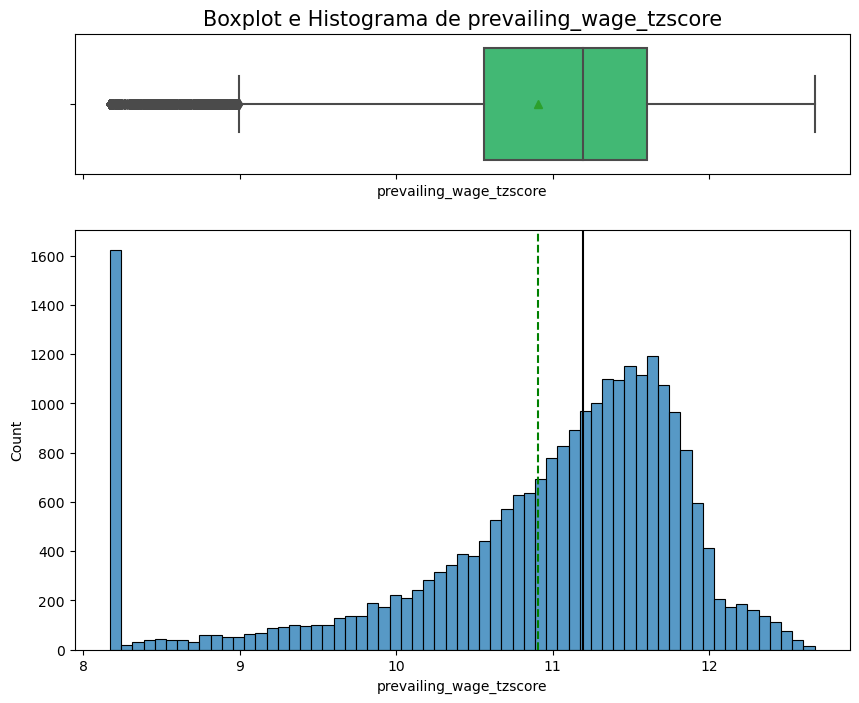

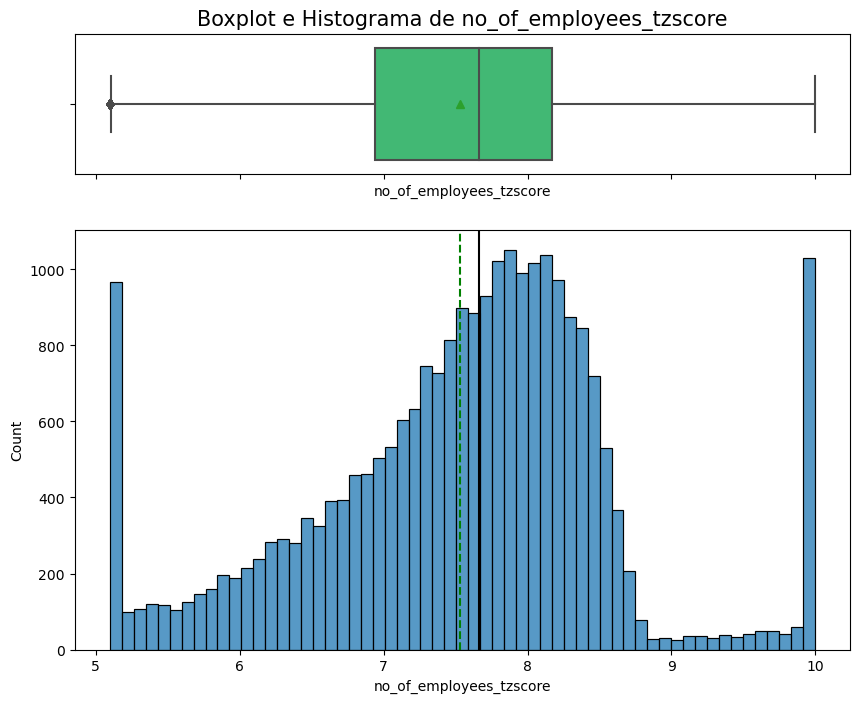

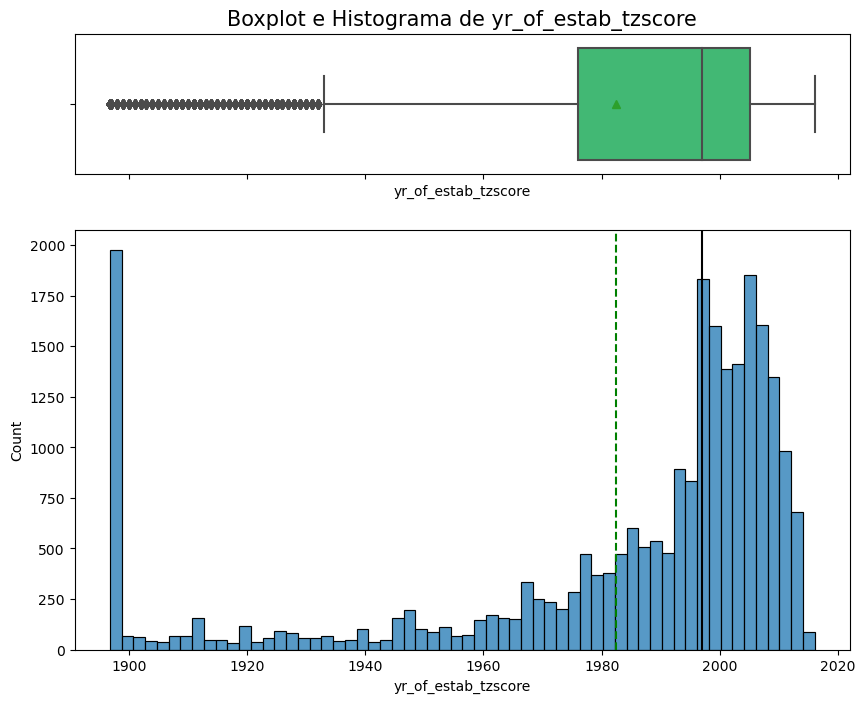

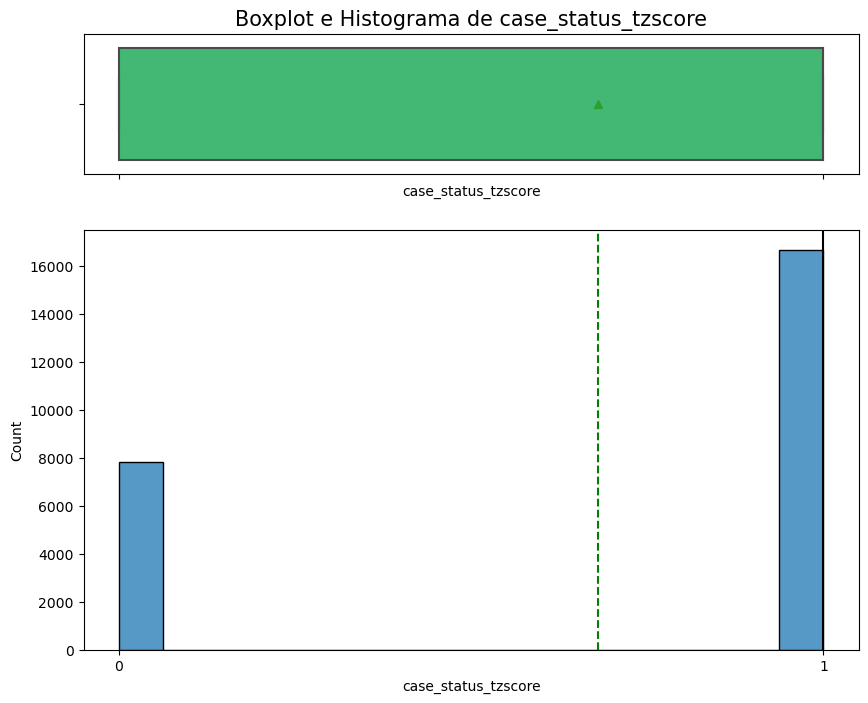

In [49]:
for i in columnas_z:
    # Gráfico de distribución 
    plot_boxplot_histogram(df2, i)

In [50]:
df2[columnas_z].describe().T

,count,mean,std,min,25%,50%,75%,max
prevailing_wage_tzscore,24520.0,10.906152,1.028081,8.170840,10.560321,11.196499,11.602596,12.673605
no_of_employees_tzscore,24520.0,7.531517,1.063831,5.099273,6.942157,7.662233,8.167707,9.994164
yr_of_estab_tzscore,24520.0,1982.431865,34.076466,1896.835510,1976.000000,1997.000000,2005.000000,2016.000000
case_status_tzscore,24520.0,0.680057,0.466464,0.000000,0.000000,1.000000,1.000000,1.000000


In [51]:
# df3 va a contener el tratamiento hasta los valores atipicos
df3 = df2.copy()

### Tratamiento de valores perdidos

In [52]:
# Verificación de valores nulos
df4 = df3[columnas_z].copy()
df4.isna().sum()

prevailing_wage_tzscore    0
no_of_employees_tzscore    0
yr_of_estab_tzscore        0
case_status_tzscore        0
dtype: int64

* No hay valores nulos

In [53]:
df4.describe(include="all").T.reset_index()

,index,count,mean,std,min,25%,50%,75%,max
0,prevailing_wage_tzscore,24520.0,10.906152,1.028081,8.170840,10.560321,11.196499,11.602596,12.673605
1,no_of_employees_tzscore,24520.0,7.531517,1.063831,5.099273,6.942157,7.662233,8.167707,9.994164
2,yr_of_estab_tzscore,24520.0,1982.431865,34.076466,1896.835510,1976.000000,1997.000000,2005.000000,2016.000000
3,case_status_tzscore,24520.0,0.680057,0.466464,0.000000,0.000000,1.000000,1.000000,1.000000


### Tratamiento de variables categóricos

In [54]:
df_categoricas

['case_id',
 'continent',
 'education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'region_of_employment',
 'unit_of_wage',
 'full_time_position']

In [55]:
df_numericas

['no_of_employees', 'yr_of_estab', 'prevailing_wage', 'case_status']

In [56]:
df_cat = pd.get_dummies(df, columns = ['continent','education_of_employee','has_job_experience', 'requires_job_training','region_of_employment','unit_of_wage','full_time_position'], drop_first=True)   #drop_first=True, Elimina la columna con las variables categoricas para dar paso a las columnas con variables numericas
df_cat = df_cat.drop(df_numericas,axis=1) # Eliminando las columnas que no fueron cambiadas
df_cat

,continent_Europe,continent_North America,continent_otros,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master's,has_job_experience_si,requires_job_training_si,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Year,unit_of_wage_otros,full_time_position_si
0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
1,0,0,0,0,0,1,1,0,1,0,0,1,0,1
2,0,0,0,0,0,0,0,1,0,0,1,1,0,1
3,0,0,0,0,0,0,0,0,0,0,1,1,0,1
4,0,0,1,0,0,1,1,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,0,0,0,0,0,0,1,1,0,1,0,1,0,1
25476,0,0,0,0,1,0,1,0,1,0,0,1,0,1
25477,0,0,0,0,0,1,1,0,0,1,0,1,0,0
25478,0,0,0,0,0,1,1,1,0,0,1,1,0,1


In [57]:
# df_final = pd.concat([df4.reset_index(drop=True), df_cat.reset_index(drop=True) ],axis = 1)   # drop=True -> Indica que no se debe crear una nueva columna con los valores antiguos de los indices
# df_final

df_final = pd.merge(df4, df_cat, left_index=True, right_index=True)
df_final

,prevailing_wage_tzscore,no_of_employees_tzscore,yr_of_estab_tzscore,case_status_tzscore,continent_Europe,continent_North America,continent_otros,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master's,has_job_experience_si,requires_job_training_si,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Year,unit_of_wage_otros,full_time_position_si
0,8.170840,9.582869,2007.00000,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
1,11.331711,7.788626,2002.00000,1,0,0,0,0,0,1,1,0,1,0,0,1,0,1
2,11.719914,9.994164,2008.00000,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1
3,11.331812,5.099273,1897.00000,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1
4,11.917773,6.987490,2005.00000,1,0,0,1,0,0,1,1,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,11.252762,7.864036,2008.00000,1,0,0,0,0,0,0,1,1,0,1,0,1,0,1
25476,12.539593,8.094073,2006.00000,1,0,0,0,0,1,0,1,0,1,0,0,1,0,1
25477,11.893407,7.022868,1910.00000,1,0,0,0,0,0,1,1,0,0,1,0,1,0,0
25478,11.363901,7.559559,1896.83551,1,0,0,0,0,0,1,1,1,0,0,1,1,0,1


In [58]:
df_final = df_final.drop(['case_status_tzscore'], axis=1)

In [59]:
# CAMBIAMOS EL NOMBRE DE LAS VARIABLES QUE TERMINAN CON _tzscore
# Obtener todas las columnas que terminan con '_tzscore'
tzscore_cols = [col for col in df_final.columns if col.endswith('_tzscore')]

# Eliminar '_tzscore' de cada columna
for col in tzscore_cols:
    new_col_name = col.replace('_tzscore', '')
    df_final.rename(columns={col: new_col_name}, inplace=True)

df_final = pd.merge(df_final, df[target], left_index=True, right_index=True)
df_final

,prevailing_wage,no_of_employees,yr_of_estab,continent_Europe,continent_North America,continent_otros,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master's,has_job_experience_si,requires_job_training_si,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Year,unit_of_wage_otros,full_time_position_si,case_status
0,8.170840,9.582869,2007.00000,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
1,11.331711,7.788626,2002.00000,0,0,0,0,0,1,1,0,1,0,0,1,0,1,1
2,11.719914,9.994164,2008.00000,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0
3,11.331812,5.099273,1897.00000,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0
4,11.917773,6.987490,2005.00000,0,0,1,0,0,1,1,0,0,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,11.252762,7.864036,2008.00000,0,0,0,0,0,0,1,1,0,1,0,1,0,1,1
25476,12.539593,8.094073,2006.00000,0,0,0,0,1,0,1,0,1,0,0,1,0,1,1
25477,11.893407,7.022868,1910.00000,0,0,0,0,0,1,1,0,0,1,0,1,0,0,1
25478,11.363901,7.559559,1896.83551,0,0,0,0,0,1,1,1,0,0,1,1,0,1,1


---

In [60]:
# Indentificar las variables 
features = list(set(df_final.columns.tolist()) - set(['case_status']))
features

['requires_job_training_si',
 'region_of_employment_South',
 'unit_of_wage_Year',
 'region_of_employment_Northeast',
 'no_of_employees',
 'continent_North America',
 'continent_Europe',
 'yr_of_estab',
 'unit_of_wage_otros',
 'full_time_position_si',
 'education_of_employee_High School',
 'education_of_employee_Doctorate',
 'continent_otros',
 'region_of_employment_West',
 'prevailing_wage',
 'has_job_experience_si',
 "education_of_employee_Master's"]

In [61]:
X = df_final[features]
y = df_final[target]

In [62]:
# Muestreo de data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify = y,
                                                    test_size = 0.3,
                                                    random_state = 22)

## Creación de modelos de bagging y boosting

### Buscamos los mejores parametros para un arbol de desición

In [63]:
# Cargar librerías para grid search

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *


In [64]:
# Definiendo los parámetros a probar

parameters = {'max_depth': [x for x in range(2,12)],
              'min_samples_leaf' : np.array([0.001,0.01, 0.025, 0.05, 0.1, 0.2]),
              'criterion': ['gini', 'entropy']
             }

In [65]:
# Definiendo modelo

dtree = DecisionTreeClassifier(random_state = 22)

In [66]:
# Ejecutando grid search con 5 folds

GridSearch = GridSearchCV(dtree, parameters, cv = 5, verbose = 5, n_jobs = 5,
                          refit = 'AUC',  # Especifica la metrica de evaluación que se utilizará
                          return_train_score = True) 

GridSearch.fit(X_train, y_train.ravel())

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 3/5] END criterion=gini, max_depth=2, min_samples_leaf=0.001;, score=(train=0.723, test=0.719) total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, min_samples_leaf=0.01;, score=(train=0.723, test=0.719) total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, min_samples_leaf=0.025;, score=(train=0.721, test=0.721) total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, min_samples_leaf=0.025;, score=(train=0.723, test=0.714) total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, min_samples_leaf=0.05;, score=(train=0.723, test=0.714) total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, min_samples_leaf=0.1;, score=(train=0.723, test=0.714) total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, min_samples_leaf=0.001;, score=(train=0.723, test=0.726) total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, min_samples_leaf=0.001;, score=(train=0.725, test=0.716) total time=   0.

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=22), n_jobs=5,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                         'min_samples_leaf': array([0.001, 0.01 , 0.025, 0.05 , 0.1  , 0.2  ])},
             refit='AUC', return_train_score=True, verbose=5)

In [67]:
GridSearch.best_params_

{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 0.001}

In [68]:
def plot_search_results(grid):
    """
    Params: 
        grid: A trained GridSearchCV object.
    """
    ## Results from grid search
    results = grid.cv_results_
    means_test = results['mean_test_score']
    stds_test = results['std_test_score']
    means_train = results['mean_train_score']
    stds_train = results['std_train_score']

    ## Getting indexes of values per hyper-parameter
    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))

    params=grid.param_grid

    ## Ploting results
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
    fig.suptitle('Score per parameter')
    fig.text(0.04, 0.5, 'MEAN SCORE', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        y_2 = np.array(means_train[best_index])
        e_2 = np.array(stds_train[best_index])
        ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test')
        ax[i].errorbar(x, y_2, e_2, linestyle='-', marker='^',label='train' )
        ax[i].set_xlabel(p.upper())

    plt.legend()
    plt.show()

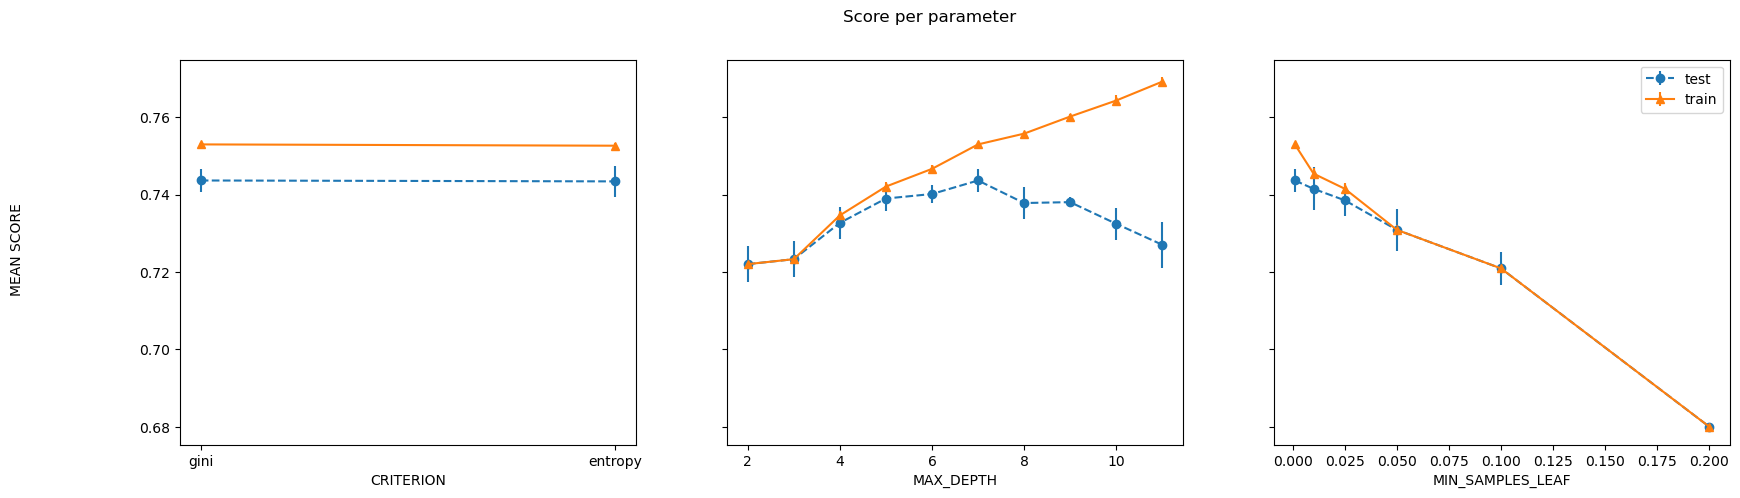

In [69]:
# Calling Method 
plot_search_results(GridSearch)

In [70]:
# Entrenamiento Óptimizado

dtreef = DecisionTreeClassifier(max_depth = 5, 
                               min_samples_leaf = 0.001,
                               random_state = 22)

dtreef = dtree.fit(X_train, y_train)
    
dtreef

DecisionTreeClassifier(random_state=22)

In [71]:
# Usando el modelo para predecir

X_train['probability'] = dtreef.predict_proba(X_train[features])[:,1]
X_test['probability']  = dtreef.predict_proba(X_test[features])[:,1]

X_train['prediction'] = dtreef.predict(X_train[features])
X_test['prediction']  = dtreef.predict(X_test[features])

In [72]:
#Resumen de todas las métricas del modelo

metricsDtreeOpt = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'dTree_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                                'dTree_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})

metricsDtreeOpt    

,metric,dTree_train,dTree_test
0,AUC,1.000000,0.603492
1,Gini,1.000000,0.206984
2,Accuracy,0.999942,0.654568
3,Precision,1.000000,0.746397
4,Recall,0.999914,0.745353
5,F1-score,0.999957,0.745875


### Clasificador Bagging

In [73]:
# Muestreo de data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify = y,
                                                    test_size = 0.3,
                                                    random_state = 22)

In [74]:
# Cargando librerías
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import time

In [75]:
# Configurando modelo de bagging
bag_clf = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=5, min_samples_leaf=0.001, random_state=22),
    n_estimators=100,
    max_samples=1.0,
    max_features=1.0,
    bootstrap=True,
    bootstrap_features=False,
    n_jobs=4,
    random_state=22)

In [76]:
# Entrenando el modelo
bag_clf.fit(X_train, y_train)


[CV 2/5] END criterion=entropy, max_depth=4, min_samples_leaf=0.05;, score=(train=0.729, test=0.727) total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, min_samples_leaf=0.05;, score=(train=0.728, test=0.731) total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, min_samples_leaf=0.05;, score=(train=0.728, test=0.731) total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, min_samples_leaf=0.05;, score=(train=0.730, test=0.720) total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, min_samples_leaf=0.1;, score=(train=0.721, test=0.721) total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, min_samples_leaf=0.1;, score=(train=0.719, test=0.727) total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, min_samples_leaf=0.1;, score=(train=0.722, test=0.718) total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, min_samples_leaf=0.1;, score=(train=0.720, test=0.724) total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4,

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                        min_samples_leaf=0.001,
                                                        random_state=22),
                  n_estimators=100, n_jobs=4, random_state=22)

In [77]:
# Usando el modelo para predecir

X_train['probability'] = bag_clf.predict_proba(X_train[features])[:,1]
X_test['probability']  = bag_clf.predict_proba(X_test[features])[:,1]

X_train['prediction'] = bag_clf.predict(X_train[features])
X_test['prediction']  = bag_clf.predict(X_test[features])

In [78]:
# Resumen de todas las métricas del modelo
metricsBag = pd.DataFrame({'metric': ['AUC', 'Gini', 'Accuracy', 'Precision', 'Recall', 'F1-score'],
                           'bag_train': [roc_auc_score(y_train, X_train.probability),
                                         (roc_auc_score(y_train, X_train.probability) * 2 - 1),
                                         accuracy_score(y_train, X_train.prediction),
                                         precision_score(y_train, X_train.prediction),
                                         recall_score(y_train, X_train.prediction),
                                         f1_score(y_train, X_train.prediction)],
                           'bag_test': [roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability) * 2 - 1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})

metricsBag

,metric,bag_train,bag_test
0,AUC,0.769949,0.766573
1,Gini,0.539898,0.533146
2,Accuracy,0.743183,0.741028
3,Precision,0.775862,0.771850
4,Recall,0.875171,0.879073
5,F1-score,0.822530,0.821979


### Ajuste de hiperparámetros - Clasificador de bagging

In [79]:
from sklearn.model_selection import GridSearchCV

# Definir la cuadrícula de hiperparámetros
param_grid = {
    'base_estimator__max_depth': [4, 6, 8],
    'base_estimator__min_samples_leaf': [0.001,0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 150],
    'max_samples': [0.5, 0.75, 1.0],
}

In [80]:
# Crear el modelo
base_estimator = DecisionTreeClassifier(random_state=22)
bag_clf = BaggingClassifier(base_estimator=base_estimator, n_jobs=4, random_state=22)

In [81]:
# Crear una instancia de GridSearchCV
grid_search = GridSearchCV(estimator=bag_clf, param_grid=param_grid, scoring='roc_auc',
                           cv=5, verbose=1, n_jobs=4)

# Entrenar el modelo con GridSearchCV
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=22),
                                         n_jobs=4, random_state=22),
             n_jobs=4,
             param_grid={'base_estimator__max_depth': [4, 6, 8],
                         'base_estimator__min_samples_leaf': [0.001, 0.01, 0.05,
                                                              0.1],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [50, 100, 150]},
             scoring='roc_auc', verbose=1)

In [82]:
GridSearch.best_params_

{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 0.001}

In [83]:
# Muestreo de data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify = y,
                                                    test_size = 0.3,
                                                    random_state = 22)

In [84]:
# Configurando modelo de bagging OPTIMIZADO
bag_clf_final = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=7, min_samples_leaf=0.001, random_state=22),
    n_estimators=100,
    max_samples=1.0,
    max_features=1.0,
    bootstrap=True,
    bootstrap_features=False,
    n_jobs=4,
    random_state=22)

In [85]:
# Entrenando el modelo
bag_clf_final.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=7,
                                                        min_samples_leaf=0.001,
                                                        random_state=22),
                  n_estimators=100, n_jobs=4, random_state=22)

In [86]:
# Usando el modelo para predecir

X_train['probability'] = bag_clf_final.predict_proba(X_train[features])[:,1]
X_test['probability']  = bag_clf_final.predict_proba(X_test[features])[:,1]

X_train['prediction'] = bag_clf_final.predict(X_train[features])
X_test['prediction']  = bag_clf_final.predict(X_test[features])

In [87]:
# Resumen de todas las métricas del modelo
metricsBestBag = pd.DataFrame({'metric': ['AUC', 'Gini', 'Accuracy', 'Precision', 'Recall', 'F1-score'],
                           'bag_train_best': [roc_auc_score(y_train, X_train.probability),
                                         (roc_auc_score(y_train, X_train.probability) * 2 - 1),
                                         accuracy_score(y_train, X_train.prediction),
                                         precision_score(y_train, X_train.prediction),
                                         recall_score(y_train, X_train.prediction),
                                         f1_score(y_train, X_train.prediction)],
                           'bag_test_best': [roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability) * 2 - 1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})

metricsRes1 = pd.merge(metricsBag, metricsBestBag, on='metric', how='left')
metricsRes1

,metric,bag_train,bag_test,bag_train_best,bag_test_best
0,AUC,0.769949,0.766573,0.789486,0.775522
1,Gini,0.539898,0.533146,0.578972,0.551043
2,Accuracy,0.743183,0.741028,0.753263,0.749048
3,Precision,0.775862,0.771850,0.791350,0.787366
4,Recall,0.875171,0.879073,0.865319,0.864481
5,F1-score,0.822530,0.821979,0.826683,0.824123


* Vemos una ligera mejora  en el AUC, GINI y en la precisión

---

### bosques aleatorios

In [88]:
# Muestreo de data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify = y,
                                                    test_size = 0.3,
                                                    random_state = 22)

In [89]:
# Cargando librerías

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [90]:
# Configurando modelo de random forest

rfc = RandomForestClassifier(n_estimators = 100,
                             max_depth = 5, 
                             min_samples_leaf = 0.01,
                             oob_score = True,
                             verbose = 1, 
                             n_jobs = 4,
                             random_state = 22)

In [91]:
rfc = rfc.fit(X_train, y_train)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [92]:
# Usando el modelo para predecir

X_train['probability'] = rfc.predict_proba(X_train[features])[:,1]
X_test['probability']  = rfc.predict_proba(X_test[features])[:,1]

X_train['prediction'] = rfc.predict(X_train[features])
X_test['prediction']  = rfc.predict(X_test[features])

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [93]:
#Resumen de todas las métricas del modelo

metricsRfc = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'rfc_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                                'rfc_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})

metricsRfc

,metric,rfc_train,rfc_test
0,AUC,0.769648,0.763195
1,Gini,0.539296,0.526390
2,Accuracy,0.729958,0.728793
3,Precision,0.742371,0.741956
4,Recall,0.923321,0.921847
5,F1-score,0.823017,0.822177


### Ajuste de hiperparámetros - Bosques aleatorios

In [94]:
from sklearn.model_selection import GridSearchCV

# Definir el espacio de búsqueda de parámetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 5, 6],
    'min_samples_leaf': [0.001,0.01, 0.02, 0.03],
    'criterion': ['gini', 'entropy']
}

In [95]:
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, scoring='roc_auc', cv=5, verbose=1, n_jobs=4)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent worke

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=5,
                                              min_samples_leaf=0.01, n_jobs=4,
                                              oob_score=True, random_state=22,
                                              verbose=1),
             n_jobs=4,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6],
                         'min_samples_leaf': [0.001, 0.01, 0.02, 0.03],
                         'n_estimators': [50, 100, 200]},
             scoring='roc_auc', verbose=1)

In [96]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 0.001,
 'n_estimators': 200}

In [97]:
# Muestreo de data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify = y,
                                                    test_size = 0.3,
                                                    random_state = 22)

In [98]:
# Configurando modelo de random forest OPTIMIZADO

rfc_final = RandomForestClassifier(n_estimators = 200,
                             max_depth = 6, 
                             min_samples_leaf = 0.001,
                             oob_score = True,
                             verbose = 1, 
                             n_jobs = 4,
                             random_state = 22)

In [99]:
rfc_final.fit(X_train, y_train)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.3s finished


RandomForestClassifier(max_depth=6, min_samples_leaf=0.001, n_estimators=200,
                       n_jobs=4, oob_score=True, random_state=22, verbose=1)

In [100]:
importances = pd.DataFrame({'features' : X_train.columns.tolist() ,
                            'importance' : rfc_final.feature_importances_}).sort_values('importance', ascending = False)

importances.loc[importances.importance > 0]

,features,importance
10,education_of_employee_High School,0.346118
15,has_job_experience_si,0.159043
16,education_of_employee_Master's,0.135621
2,unit_of_wage_Year,0.075510
11,education_of_employee_Doctorate,0.063872
14,prevailing_wage,0.061606
6,continent_Europe,0.056619
13,region_of_employment_West,0.025102
5,continent_North America,0.014308
4,no_of_employees,0.014088


In [101]:
# Usando el modelo para predecir

X_train['probability'] = rfc_final.predict_proba(X_train[features])[:,1]
X_test['probability']  = rfc_final.predict_proba(X_test[features])[:,1]

X_train['prediction'] = rfc_final.predict(X_train[features])
X_test['prediction']  = rfc_final.predict(X_test[features])

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      |

In [102]:
#Resumen de todas las métricas del modelo

metricsBestRfc = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'best_rfc_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                                'best_rfc_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})


metricsRes2 = pd.merge(metricsRfc, metricsBestRfc, on='metric', how='left')
metricsRes2

,metric,rfc_train,rfc_test,best_rfc_train,best_rfc_test
0,AUC,0.769648,0.763195,0.779254,0.768293
1,Gini,0.539296,0.526390,0.558507,0.536587
2,Accuracy,0.729958,0.728793,0.737299,0.735590
3,Precision,0.742371,0.741956,0.749425,0.748053
4,Recall,0.923321,0.921847,0.921950,0.921647
5,F1-score,0.823017,0.822177,0.826783,0.825826


* Vemos una mejora en el GINI y una ligera mejora en el Accuracy en la parte de testing

---

### Boosting: construcción de modelos y ajuste de hiperparámetros

### AdaBoost

In [103]:
# Muestreo de data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify = y,
                                                    test_size = 0.3,
                                                    random_state = 22)

In [104]:
# Cargando librerías

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [105]:
# Configuramos el modelo de adaboost

ada_clf = AdaBoostClassifier(
          DecisionTreeClassifier(max_depth = 1),
          n_estimators = 200,
          algorithm = 'SAMME.R',
          learning_rate = 0.5,
          random_state = 22)

In [106]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200, random_state=22)

In [107]:
# Usando el modelo para predecir

X_train['probability'] = ada_clf.predict_proba(X_train[features])[:,1]
X_test['probability']  = ada_clf.predict_proba(X_test[features])[:,1]

X_train['prediction'] = ada_clf.predict(X_train[features])
X_test['prediction']  = ada_clf.predict(X_test[features])

In [108]:
#Resumen de todas las métricas del modelo

metricsAdab = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'adab_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                                'adab_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})

metricsAdab

,metric,adab_train,adab_test
0,AUC,0.769612,0.761789
1,Gini,0.539223,0.523578
2,Accuracy,0.739863,0.736406
3,Precision,0.761711,0.759749
4,Recall,0.898561,0.895663
5,F1-score,0.824496,0.822126


### Ajuste de hiperparámetros - AdaBoost

In [109]:
from sklearn.model_selection import GridSearchCV

# Definir el espacio de búsqueda de parámetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.5, 1.0],
    'base_estimator__max_depth': [1, 2, 3],
}

In [110]:
grid_search = GridSearchCV(estimator=ada_clf, param_grid=param_grid, scoring='roc_auc', cv=5, verbose=1, n_jobs=4)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                                          learning_rate=0.5, n_estimators=200,
                                          random_state=22),
             n_jobs=4,
             param_grid={'base_estimator__max_depth': [1, 2, 3],
                         'learning_rate': [0.1, 0.5, 1.0],
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc', verbose=1)

In [111]:
grid_search.best_params_

{'base_estimator__max_depth': 3, 'learning_rate': 0.1, 'n_estimators': 100}

In [112]:
# Muestreo de data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify = y,
                                                    test_size = 0.3,
                                                    random_state = 22)

In [113]:
# Configuramos el modelo de adaboost OPTIMIZADO

ada_clf_fina = AdaBoostClassifier(
          DecisionTreeClassifier(max_depth = 3),
          n_estimators = 100,
          algorithm = 'SAMME.R',
          learning_rate = 0.1,
          random_state = 22)

In [114]:
ada_clf_fina.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.1, n_estimators=100, random_state=22)

In [115]:
importances = pd.DataFrame({'features' : X_train.columns.tolist() ,
                            'importance' : ada_clf_fina.feature_importances_}).sort_values('importance', ascending = False)

importances.loc[importances.importance > 0]

,features,importance
4,no_of_employees,0.146772
14,prevailing_wage,0.143489
7,yr_of_estab,0.077712
16,education_of_employee_Master's,0.076094
10,education_of_employee_High School,0.075223
15,has_job_experience_si,0.072849
6,continent_Europe,0.064164
3,region_of_employment_Northeast,0.054847
13,region_of_employment_West,0.053195
11,education_of_employee_Doctorate,0.050248


In [116]:
# Usando el modelo para predecir

X_train['probability'] = ada_clf_fina.predict_proba(X_train[features])[:,1]
X_test['probability']  = ada_clf_fina.predict_proba(X_test[features])[:,1]

X_train['prediction'] = ada_clf_fina.predict(X_train[features])
X_test['prediction']  = ada_clf_fina.predict(X_test[features])

In [117]:
#Resumen de todas las métricas del modelo

metricsBestAda = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'best_Ada_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                                'best_Ada_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})


metricsRes3 = pd.merge(metricsAdab, metricsBestAda, on='metric', how='left')
metricsRes3

,metric,adab_train,adab_test,best_Ada_train,best_Ada_test
0,AUC,0.769612,0.761789,0.791524,0.773320
1,Gini,0.539223,0.523578,0.583049,0.546641
2,Accuracy,0.739863,0.736406,0.758273,0.749728
3,Precision,0.761711,0.759749,0.784941,0.776495
4,Recall,0.898561,0.895663,0.887766,0.887468
5,F1-score,0.824496,0.822126,0.833193,0.828281


* Notamos una mejora en el AUC, Gini, Accuracy

---

### GRADIENT BOOST

In [118]:
# Muestreo de data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify = y,
                                                    test_size = 0.3,
                                                    random_state = 22)

In [119]:
# Cargando librerías

from sklearn.ensemble import GradientBoostingClassifier
import time

In [120]:
# Configuramos el modelo de GradientBoosting

gb_clf = GradientBoostingClassifier(n_estimators=200,
                                    learning_rate=0.1,
                                    max_depth=3,
                                    random_state=22)

In [121]:
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=200, random_state=22)

In [122]:
# Usando el modelo para predecir

X_train['probability'] = gb_clf.predict_proba(X_train[features])[:,1]
X_test['probability']  = gb_clf.predict_proba(X_test[features])[:,1]

X_train['prediction'] = gb_clf.predict(X_train[features])
X_test['prediction']  = gb_clf.predict(X_test[features])

In [123]:
#Resumen de todas las métricas del modelo

metricsGradient = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'grad_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                                'grad_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})

metricsGradient

,metric,grad_train,grad_test
0,AUC,0.803086,0.774953
1,Gini,0.606171,0.549906
2,Accuracy,0.765090,0.750136
3,Precision,0.788781,0.778168
4,Recall,0.893934,0.884869
5,F1-score,0.838072,0.828096


### Ajuste de hiperparámetros - GRADIENT BOOST

In [124]:
from sklearn.model_selection import GridSearchCV

# Definir el espacio de búsqueda de parámetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [2, 3, 4],
}

In [125]:
grid_search = GridSearchCV(estimator=gb_clf, param_grid=param_grid, scoring='roc_auc', cv=5, verbose=1, n_jobs=4)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(n_estimators=200,
                                                  random_state=22),
             n_jobs=4,
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [2, 3, 4],
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc', verbose=1)

In [126]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 300}

In [127]:
# Muestreo de data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify = y,
                                                    test_size = 0.3,
                                                    random_state = 22)

In [128]:
# Configuramos el modelo de GradientBoosting OPTIMIZADO

gb_clf_final = GradientBoostingClassifier(n_estimators=300,
                                    learning_rate=0.1,
                                    max_depth=2,
                                    random_state=22)


In [129]:
gb_clf_final.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=2, n_estimators=300, random_state=22)

In [130]:
importances = pd.DataFrame({'features' : X_train.columns.tolist() ,
                            'importance' : gb_clf_final.feature_importances_}).sort_values('importance', ascending = False)

importances.loc[importances.importance > 0]

,features,importance
10,education_of_employee_High School,0.319853
15,has_job_experience_si,0.183692
16,education_of_employee_Master's,0.094788
2,unit_of_wage_Year,0.087935
11,education_of_employee_Doctorate,0.079353
6,continent_Europe,0.054381
13,region_of_employment_West,0.052130
14,prevailing_wage,0.036626
4,no_of_employees,0.022486
3,region_of_employment_Northeast,0.022191


In [131]:
# Usando el modelo para predecir

X_train['probability'] = gb_clf_final.predict_proba(X_train[features])[:,1]
X_test['probability']  = gb_clf_final.predict_proba(X_test[features])[:,1]

X_train['prediction'] = gb_clf_final.predict(X_train[features])
X_test['prediction']  = gb_clf_final.predict(X_test[features])

In [132]:
#Resumen de todas las métricas del modelo

metricsBestgrad = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'best_grad_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                                'best_grad_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})


metricsRes4 = pd.merge(metricsGradient, metricsBestgrad, on='metric', how='left')
metricsRes4

,metric,grad_train,grad_test,best_grad_train,best_grad_test
0,AUC,0.803086,0.774953,0.786195,0.770443
1,Gini,0.606171,0.549906,0.572389,0.540887
2,Accuracy,0.765090,0.750136,0.753845,0.746330
3,Precision,0.788781,0.778168,0.782747,0.777267
4,Recall,0.893934,0.884869,0.883139,0.878873
5,F1-score,0.838072,0.828096,0.829918,0.824953


* Vemos que ha disminuido en una cantidad muy pequeña en la mayoria de los parametros, por lo que nos hace pensar de que seria mejor el modelo anterior

## Información práctica y recomendaciones

### Resumen

In [134]:
metricsRes2 = metricsRes2.drop(columns='metric')
metricsRes3 = metricsRes3.drop(columns='metric')
metricsRes4 = metricsRes4.drop(columns='metric')



result = pd.concat([metricsRes1, metricsRes2, metricsRes3, metricsRes4], axis=1)
result

,metric,bag_train,bag_test,bag_train_best,bag_test_best,rfc_train,rfc_test,best_rfc_train,best_rfc_test,adab_train,adab_test,best_Ada_train,best_Ada_test,grad_train,grad_test,best_grad_train,best_grad_test
0,AUC,0.769949,0.766573,0.789486,0.775522,0.769648,0.763195,0.779254,0.768293,0.769612,0.761789,0.791524,0.773320,0.803086,0.774953,0.786195,0.770443
1,Gini,0.539898,0.533146,0.578972,0.551043,0.539296,0.526390,0.558507,0.536587,0.539223,0.523578,0.583049,0.546641,0.606171,0.549906,0.572389,0.540887
2,Accuracy,0.743183,0.741028,0.753263,0.749048,0.729958,0.728793,0.737299,0.735590,0.739863,0.736406,0.758273,0.749728,0.765090,0.750136,0.753845,0.746330
3,Precision,0.775862,0.771850,0.791350,0.787366,0.742371,0.741956,0.749425,0.748053,0.761711,0.759749,0.784941,0.776495,0.788781,0.778168,0.782747,0.777267
4,Recall,0.875171,0.879073,0.865319,0.864481,0.923321,0.921847,0.921950,0.921647,0.898561,0.895663,0.887766,0.887468,0.893934,0.884869,0.883139,0.878873
5,F1-score,0.822530,0.821979,0.826683,0.824123,0.823017,0.822177,0.826783,0.825826,0.824496,0.822126,0.833193,0.828281,0.838072,0.828096,0.829918,0.824953


### Conclusiones

* se han encontrado como cantidad de empleados numeros negativos lo cual es algo imposible y se procedio a corregir
* Se han encontrado tambien salarios de 2 dolares lo cual me parece muy dificil de que sea realidad y se le coloco un minimo de 300 dolares
* En el caso de ramdon forest se esta tomando como variables más importante que tenga una minima educación de high School y tambien que posea experiencia
* En el caso de AdaBoost se esta tomando como variables más importantes el numero de empleados como tambien el salario promedio pagado a los trabajadores
* En el caso de Gradient Boost se esta tomando como variables más importantes la educación High school como tambien la experiencia, similar a los bosques aleatorios

* Segun encontramos como mejor modelo podriamos escoger al best_grad -> GRADIENT BOOSTING OPTIMIZADO, debido a que tiene mejores parametros en la precisíon

* Segun las conclusiones recomendamos enfocarnos en el nivel educativo del empleado y tambien que poseean experiencia para encontrar mejores candidatos para la selección de la VISA